## 线性模型和部分依赖图
SP500

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import sys
sys.path.append(r'C:\Users\Administrator\Desktop\Repositories\Low-Frequency-Spread-Estimator\notebook\tools')
sys.path.append(r'C:\Users\18316\Desktop\Repositories\Low-Frequency-Spread-Estimator\notebook\tools')
sys.path.append(r'C:\Users\Windows11\Desktop\Repositories\Low-Frequency-Spread-Estimator\notebook\tools')
from train_tools import *
from get_signal import *
from naive_model import *
import pickle

sys.path.append('C:/Users/Administrator/Desktop/Repositories/Low-Frequency-Spread-Estimator')
sys.path.append('C:/Users/18316/Desktop/Repositories/Low-Frequency-Spread-Estimator')
sys.path.append('C:/Users/Handsome Bad Guy/Desktop/Repositories/Low-Frequency-Spread-Estimator')
sys.path.append('C:/Users/Windows11/Desktop/Repositories/Low-Frequency-Spread-Estimator')

from SpreadEstimator.SpreadEstimator import SpreadEstimator
from mytools.AutoTester import AutoTester

import lightgbm as lgbm

In [2]:
import torch
Linear_spread_cs = torch.load(r'C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\dump_model/Linear_spread_cs.pt')
Linear_rela_cs = torch.load(r'C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\dump_model/Linear_rela_cs.pt')

In [3]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\linear_spread_cs.pkl", 'wb') as f:
    pickle.dump(Linear_spread_cs.weight.detach().cpu().numpy()[0][[2, 1, 3, 4, 5, 0, 7, 10, 11]], f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\linear_rela_cs.pkl", 'wb') as f:
    pickle.dump(Linear_rela_cs.weight.detach().cpu().numpy()[0][[2, 1, 3, 4, 5, 0, 7, 10, 11]], f)

### 查看标准差标准化后的系数

In [72]:
se = SpreadEstimator()
univ = ~np.isnan(se.data.data_dic['close'])  # 合法的univ
with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_spread.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_spread.pkl', 'rb') as f:
    target = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ)
spread_std = np.zeros(10)
for i in range(len(x)):
    spread_std += np.std(x[i].cpu().numpy(),axis=0)
spread_std /= len(x)

with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_rela.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_rela.pkl', 'rb') as f:
    target = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ)
rela_std = np.zeros(10)
for i in range(len(x)):
    rela_std += np.std(x[i].cpu().numpy(),axis=0)
rela_std /= len(x)


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 888.08it/s]


In [ ]:
import matplotlib.pyplot as plt
fea_names = [ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL', 'log_close', 'log_volume', 'log_cap']  # 特征名字
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, Linear_spread_cs.weight.detach().cpu().numpy()[0][[2, 1, 3, 4, 5, 0, 7, 10, 11]])
plt.xticks(rotation=90)
plt.ylabel('coefficient')

plt.show()

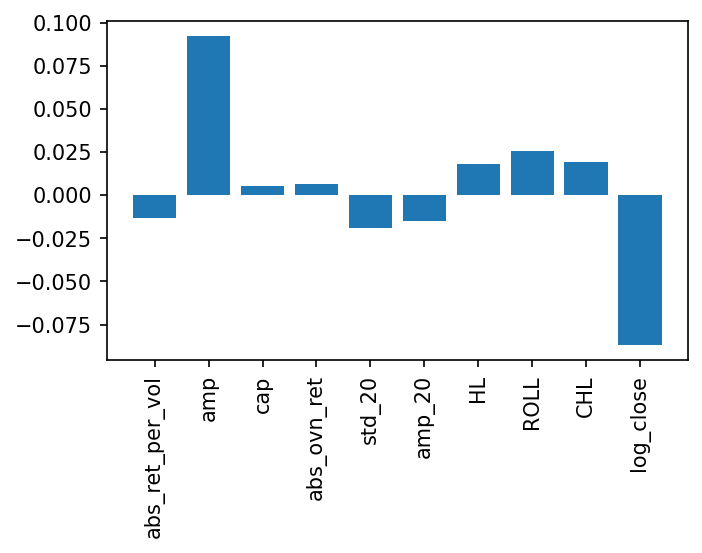

In [74]:
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, Linear_rela_cs.weight.detach().cpu().numpy()[0]*rela_std*100)
plt.xticks(rotation=90)
plt.show()

In [9]:
Linear_spread_cs.weight.detach().cpu().numpy()[0]

array([-0.13875654,  0.02161704, -0.00329324,  0.01702883, -0.00924768,
        0.00143344,  0.00058518, -0.00314383, -0.00058875,  0.00120247],
      dtype=float32)

### lgbm特征重要性

In [98]:
with open(r'C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\dump_model\lgbm_rela_cs.pkl', 'rb') as f:
    lgbm_rela = pickle.load(f)
with open(r'C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\dump_model\lgbm_spread_cs.pkl', 'rb') as f:
    lgbm_spread = pickle.load(f)    

In [ ]:
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])
plt.figure(figsize=(6,3),dpi=150)
plt.bar(fea_names, (lgbm_spread.feature_importance()/np.sum(lgbm_spread.feature_importance()))[[2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11]])
plt.xticks(rotation=90)
plt.ylabel('feature importance')
plt.show()


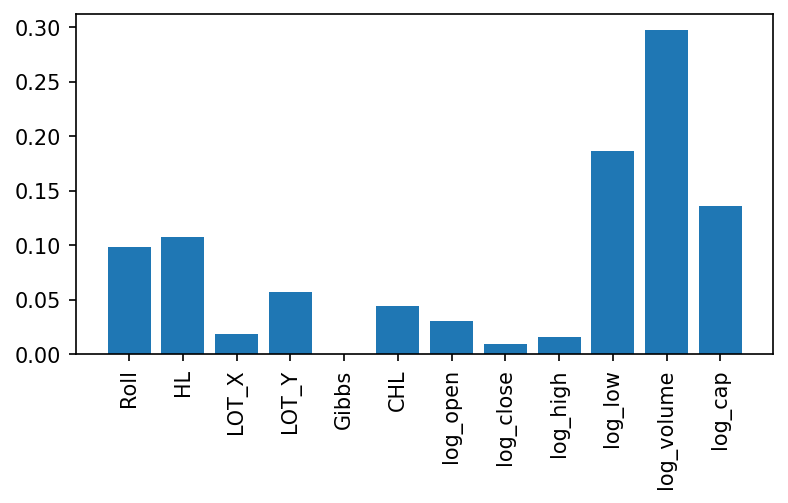

In [4]:
plt.figure(figsize=(6,3),dpi=150)
plt.bar(fea_names, lgbm_rela.feature_importance()/np.sum(lgbm_rela.feature_importance()))
plt.xticks(rotation=90)
# plt.ylabel('feature importance')
plt.show()

### XGBoost特征重要性

In [3]:
with open(r'D:\Documents\学习资料\本科毕业论文/model/xgb_rela.pkl', 'rb') as f:
    xgb_rela = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/model/xgb_spread.pkl', 'rb') as f:
    xgb_spread = pickle.load(f)    

C:\Users\18316\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


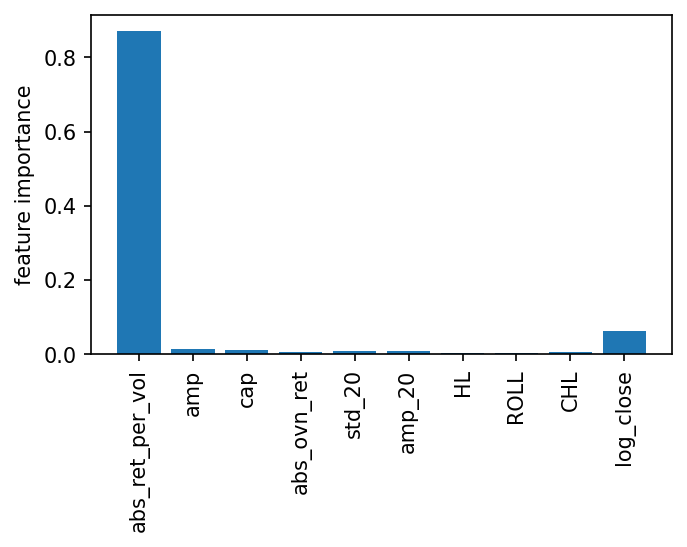

In [4]:
fea_names = [ 'abs_ret_per_vol', 'amp', 'cap', 'abs_ovn_ret', 'std_20', 'amp_20', 'HL', 'ROLL', 'CHL', 'log_close']
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, xgb_spread.feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('feature importance')
plt.show()


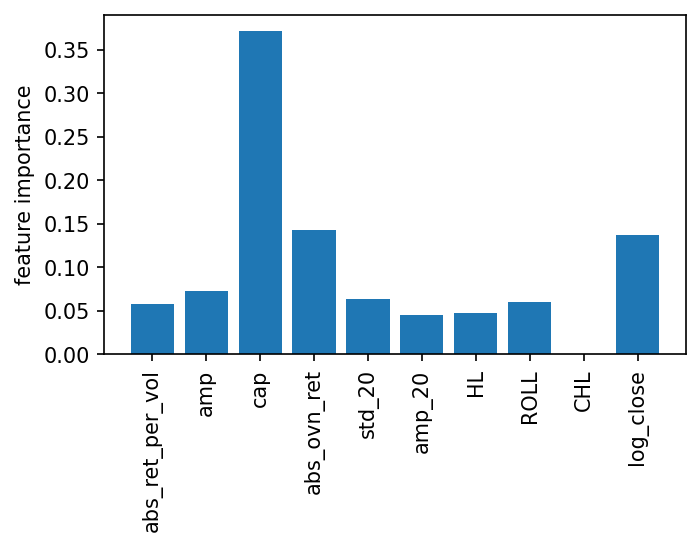

In [9]:
fea_names = [ 'abs_ret_per_vol', 'amp', 'cap', 'abs_ovn_ret', 'std_20', 'amp_20', 'HL', 'ROLL', 'CHL', 'log_close']
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, xgb_rela.feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('feature importance')
plt.show()


### 神经网络的部分依赖图

In [9]:
import torch
GateNet_rela_cs = torch.load(r'C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\dump_model/GateNet_rela_cs.pt')
GateNet_spread_cs = torch.load(r'C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\dump_model/GateNet_spread_cs.pt')

In [15]:
GateNet_rela_cs(x_new)

tensor([[ 0.0918],
        [-0.0034],
        [ 0.5859],
        ...,
        [ 0.3367],
        [ 0.6256],
        [-0.2009]], device='cuda:0', grad_fn=<AddmmBackward0>)

#### spread的部份依赖图

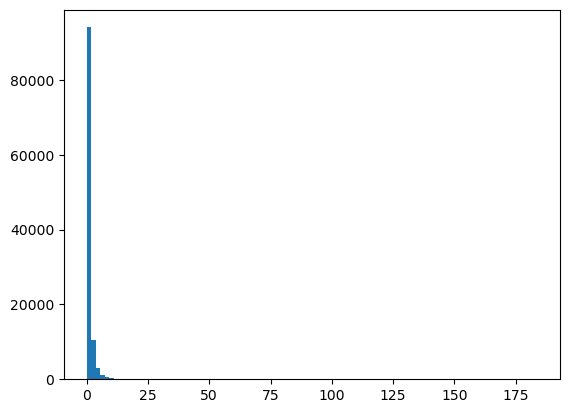

In [62]:
with open(f'{data_path}/signal_spread.pkl', 'rb') as f:
    signal = pickle.load(f)
plt.hist(signal[:, :, 0].flatten(), bins=100)
plt.show()

In [58]:
se = SpreadEstimator(market='SP500')
univ = (se.data.data_dic['volume'] > 0) & (se.data.spread_dic['spread']<5)  # 合法的univ

data_path = r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity"
univ = se.data.data_dic['volume'] > 0  # 合法的univ
with open(f'{data_path}/signal_spread.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(f'{data_path}/target_spread.pkl', 'rb') as f:
    target = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ, 20, 120)
xx = []
for x_ in x:
    for i in range(x_.shape[1]):
        x_[:, i] -= torch.nanmean(x_[:, i])
        x_[torch.isnan(x_[:,i]), i] = 0
        x_[:, i] /= torch.std(x_[:, i])
    xx.append(x_)
x = xx
x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)

x_m = []
y_m = []
for i in tqdm(range(12)):
    lb = np.nanmax([torch.min(x[:, i]).item(),-3])
    ub = np.nanmin([torch.max(x[:, i]).item(),3])
    x_rp = np.arange(lb,ub,(ub-lb)/20)
    y_rp = []
    for xx in x_rp:
        x_new = torch.clone(x)
        x_new[:,i] = xx
        x_new[torch.isnan(x_new)] = 0
        y_rp.append(torch.mean(GateNet_spread_cs(x_new)).item())
    x_m.append(x_rp)
    y_m.append(y_rp)

100%|████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 115.93it/s]


In [59]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_spread.pkl", 'wb') as f:
    pickle.dump(x_m, f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_spread.pkl", 'wb') as f:
    pickle.dump(y_m, f)

In [ ]:
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])

plt.figure(figsize=(10,20), dpi=150)
plt.subplots_adjust(hspace=0.4)
for i in range(12):
    plt.subplot(6,2,i+1)
    plt.plot(x_m[i], np.array(y_m[i]))
#     plt.hist(x[:,i].cpu().numpy(),density=True)
    plt.xlabel(fea_names[i])
    if i%2 == 0:
        plt.ylabel('estimated spread')
plt.show()

#### rela_spread部份依赖图

In [13]:
se = SpreadEstimator(market='SP500')
univ = se.data.data_dic['volume'] > 0  # 合法的univ

data_path = r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity"
univ = se.data.data_dic['volume'] > 0  # 合法的univ
with open(f'{data_path}/signal_rela.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(f'{data_path}/target_rela.pkl', 'rb') as f:
    target = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ, 20, 120)
xx = []
for x_ in x:
    for i in range(x_.shape[1]):
        x_[:, i] -= torch.mean(x_[:, i])
        x_[:, i] /= torch.std(x_[:, i])
    xx.append(x_)
x = xx
x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)

x_m = []
y_m = []
y_m_Linear = []  #　存放Linear的预测
for i in tqdm(range(12)):
    lb = np.nanmax([torch.min(x[:, i]).item(),-3])
    ub = np.nanmin([torch.max(x[:, i]).item(),3])
    x_rp = np.arange(lb,ub,(ub-lb)/20)
    y_rp = []
    y_rp_Linear = []
    for xx in x_rp:
        x_new = torch.clone(x)
        x_new[:,i] = xx
        x_new[torch.isnan(x_new)] = 0
        y_rp.append(torch.mean(GateNet_rela_cs(x_new)).item())
        y_rp_Linear.append(torch.mean(GateNet_rela_cs(x_new)).item())
    x_m.append(x_rp)
    y_m.append(y_rp)
    y_m_Linear.append(y_rp_Linear)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 46.87it/s]


In [14]:
x_m

[array([-3.00000000e+00, -2.70000000e+00, -2.40000000e+00, -2.10000000e+00,
        -1.80000000e+00, -1.50000000e+00, -1.20000000e+00, -9.00000000e-01,
        -6.00000000e-01, -3.00000000e-01, -1.77635684e-15,  3.00000000e-01,
         6.00000000e-01,  9.00000000e-01,  1.20000000e+00,  1.50000000e+00,
         1.80000000e+00,  2.10000000e+00,  2.40000000e+00,  2.70000000e+00]),
 array([-3.00000000e+00, -2.70000000e+00, -2.40000000e+00, -2.10000000e+00,
        -1.80000000e+00, -1.50000000e+00, -1.20000000e+00, -9.00000000e-01,
        -6.00000000e-01, -3.00000000e-01, -1.77635684e-15,  3.00000000e-01,
         6.00000000e-01,  9.00000000e-01,  1.20000000e+00,  1.50000000e+00,
         1.80000000e+00,  2.10000000e+00,  2.40000000e+00,  2.70000000e+00]),
 array([-2.91088319, -2.61533903, -2.31979487, -2.02425071, -1.72870655,
        -1.43316239, -1.13761823, -0.84207407, -0.54652991, -0.25098575,
         0.04455841,  0.34010257,  0.63564672,  0.93119088,  1.22673504,
         1.522279

In [10]:
torch.mean(y)*100

tensor(0.7596, device='cuda:0')

In [15]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_rela.pkl", 'wb') as f:
    pickle.dump(x_m, f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_rela.pkl", 'wb') as f:
    pickle.dump(y_m, f)

In [8]:
np.mean(y_m[0])

4.660791205242276

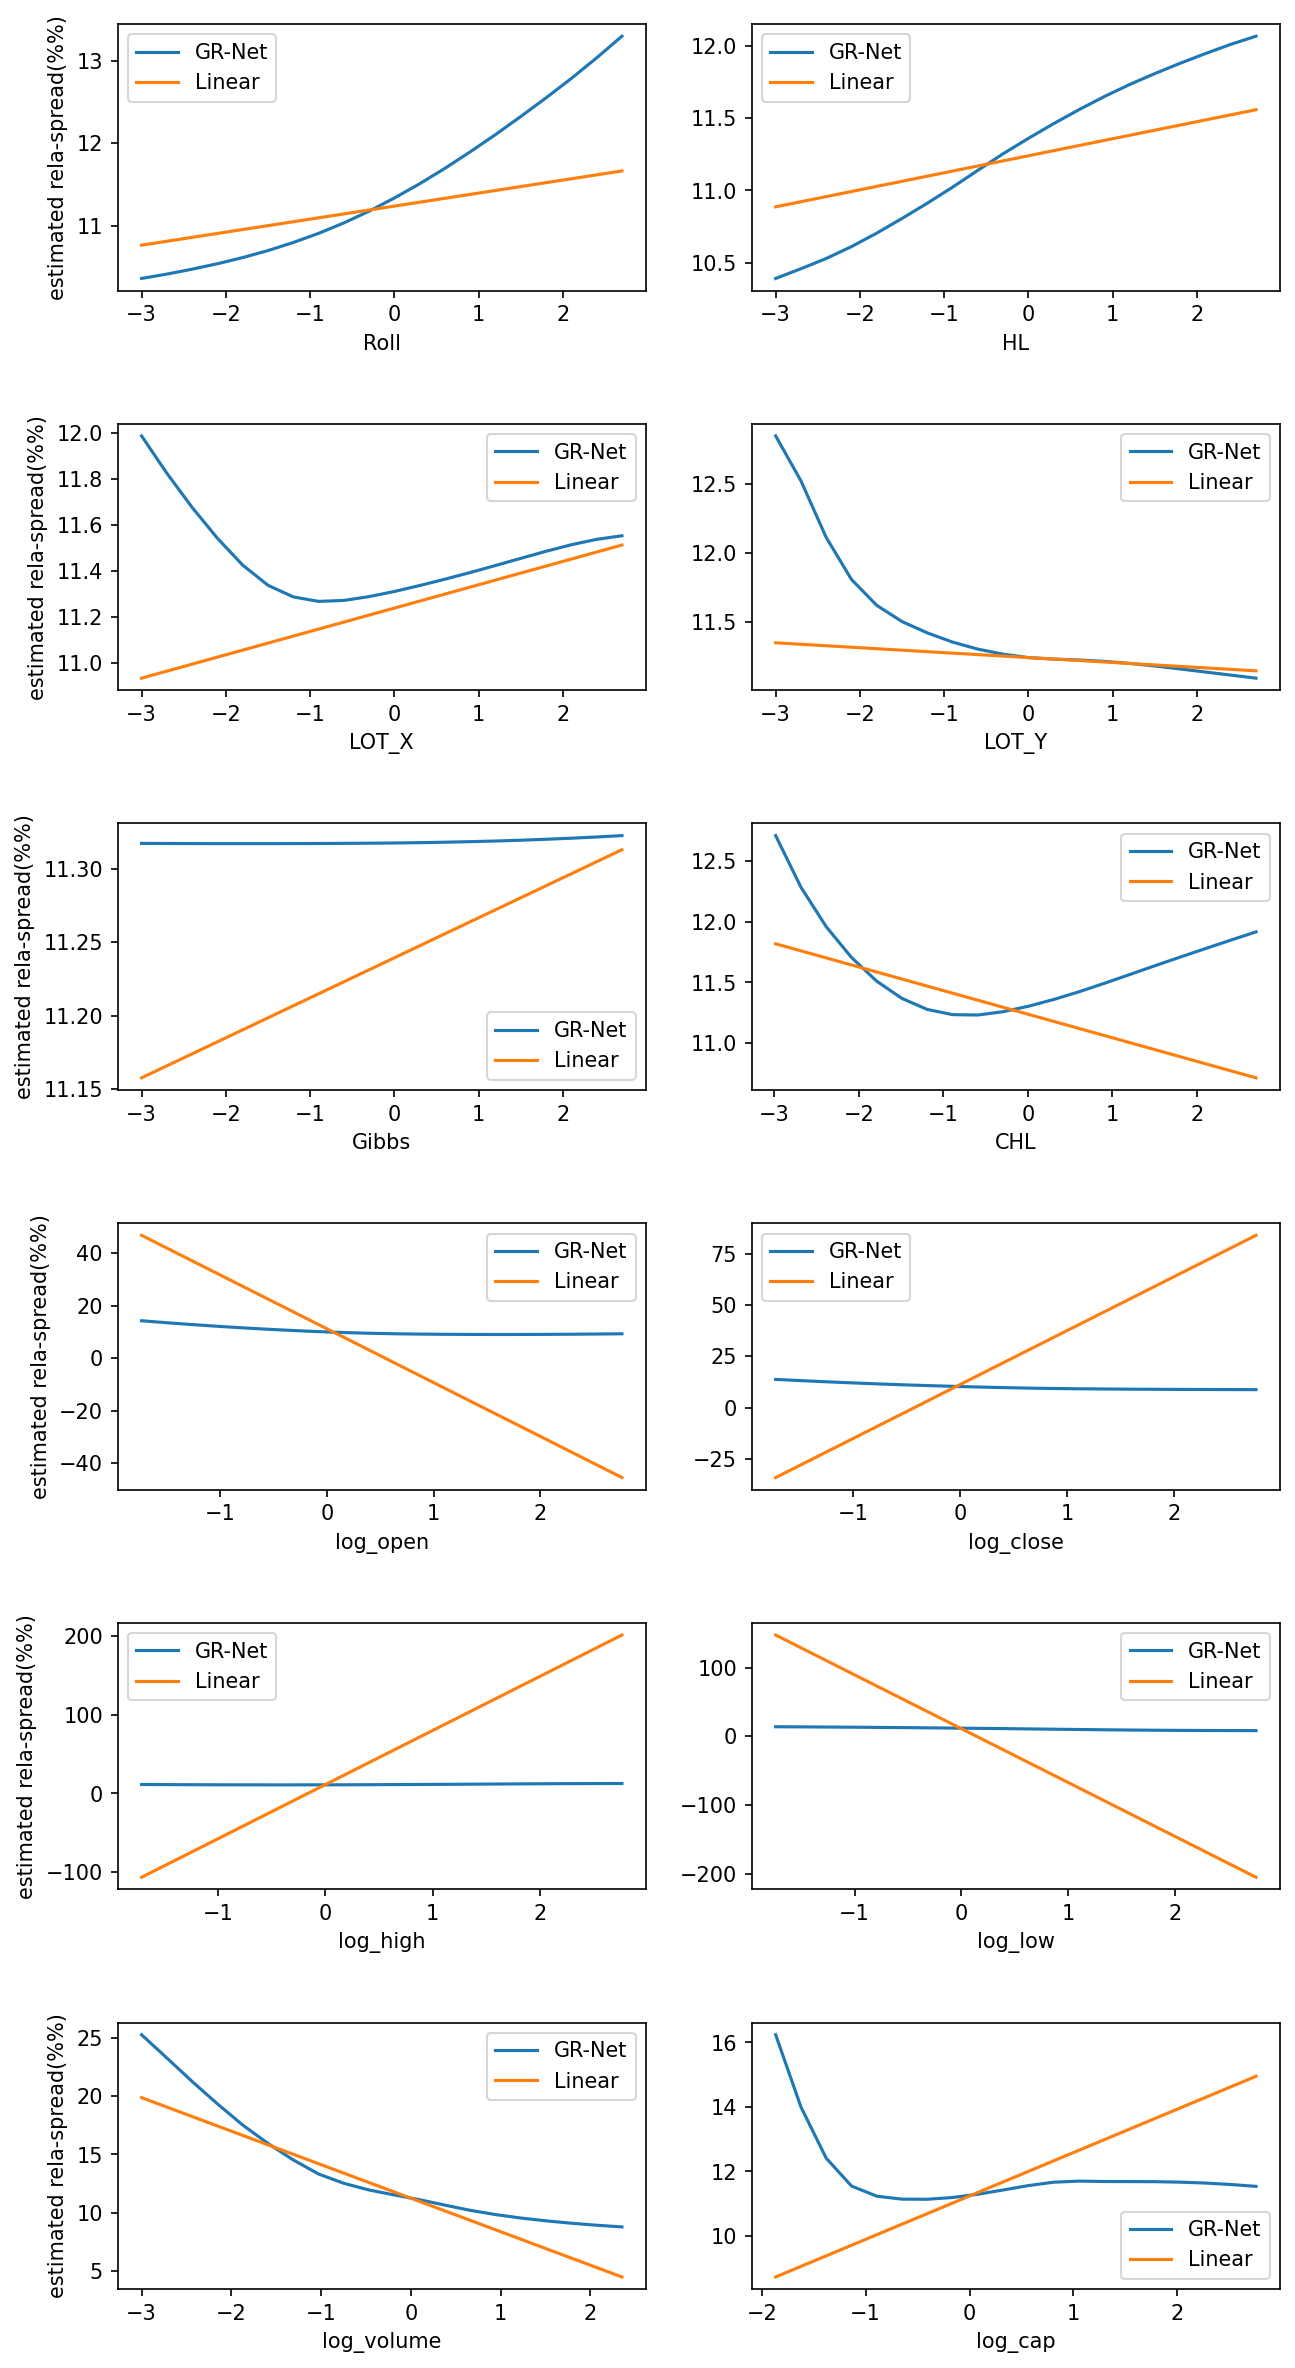

In [39]:
plt.figure(figsize=(10,20), dpi=150)
plt.subplots_adjust(hspace=0.5)
for i in range(12):
    plt.subplot(6,2,i+1)
    plt.plot(x_m[i], np.array(y_m[i])/100, label='GR-Net')
    plt.plot(x_m[i], np.array(y_m_Linear[i])/100, label='Linear')
    plt.xlabel(fea_names[i])
    if i%2 == 0:
        plt.ylabel('estimated rela-spread(%%)')
    plt.legend()
plt.show()

### 树模型的部分依赖图

#### spread

In [81]:
se = SpreadEstimator(market='SP500')
univ = se.data.data_dic['volume'] > 0  # 合法的univ

data_path = r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity"
univ = se.data.data_dic['volume'] > 0 &  (se.data.spread_dic['spread']<5) # 合法的univ
with open(f'{data_path}/signal_spread.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(f'{data_path}/target_spread.pkl', 'rb') as f:
    target = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ, 20, 120)
xx = []
for x_ in x:
    for i in range(x_.shape[1]):
        x_[:, i] -= torch.mean(x_[:, i])
        x_[:, i] /= torch.std(x_[:, i])
    xx.append(x_)
x = xx
x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)

x_m = []
y_m = []
for i in tqdm(range(12)):
    lb = np.nanmax([torch.min(x[:, i]).item(),-3])
    ub = np.nanmin([torch.max(x[:, i]).item(),3])
    x_rp = np.arange(lb,ub,(ub-lb)/20)
    y_rp = []
    for xx in x_rp:
        x_new = torch.clone(x)
        x_new[:,i] = xx
        y_rp.append(np.mean(lgbm_spread.predict(x_new.cpu().detach().numpy())))
    x_m.append(x_rp)
    y_m.append(y_rp)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00, 11.33it/s]


In [83]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_lgb.pkl", 'wb') as f:
    pickle.dump(x_m, f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_lgb.pkl", 'wb') as f:
    pickle.dump(y_m, f)

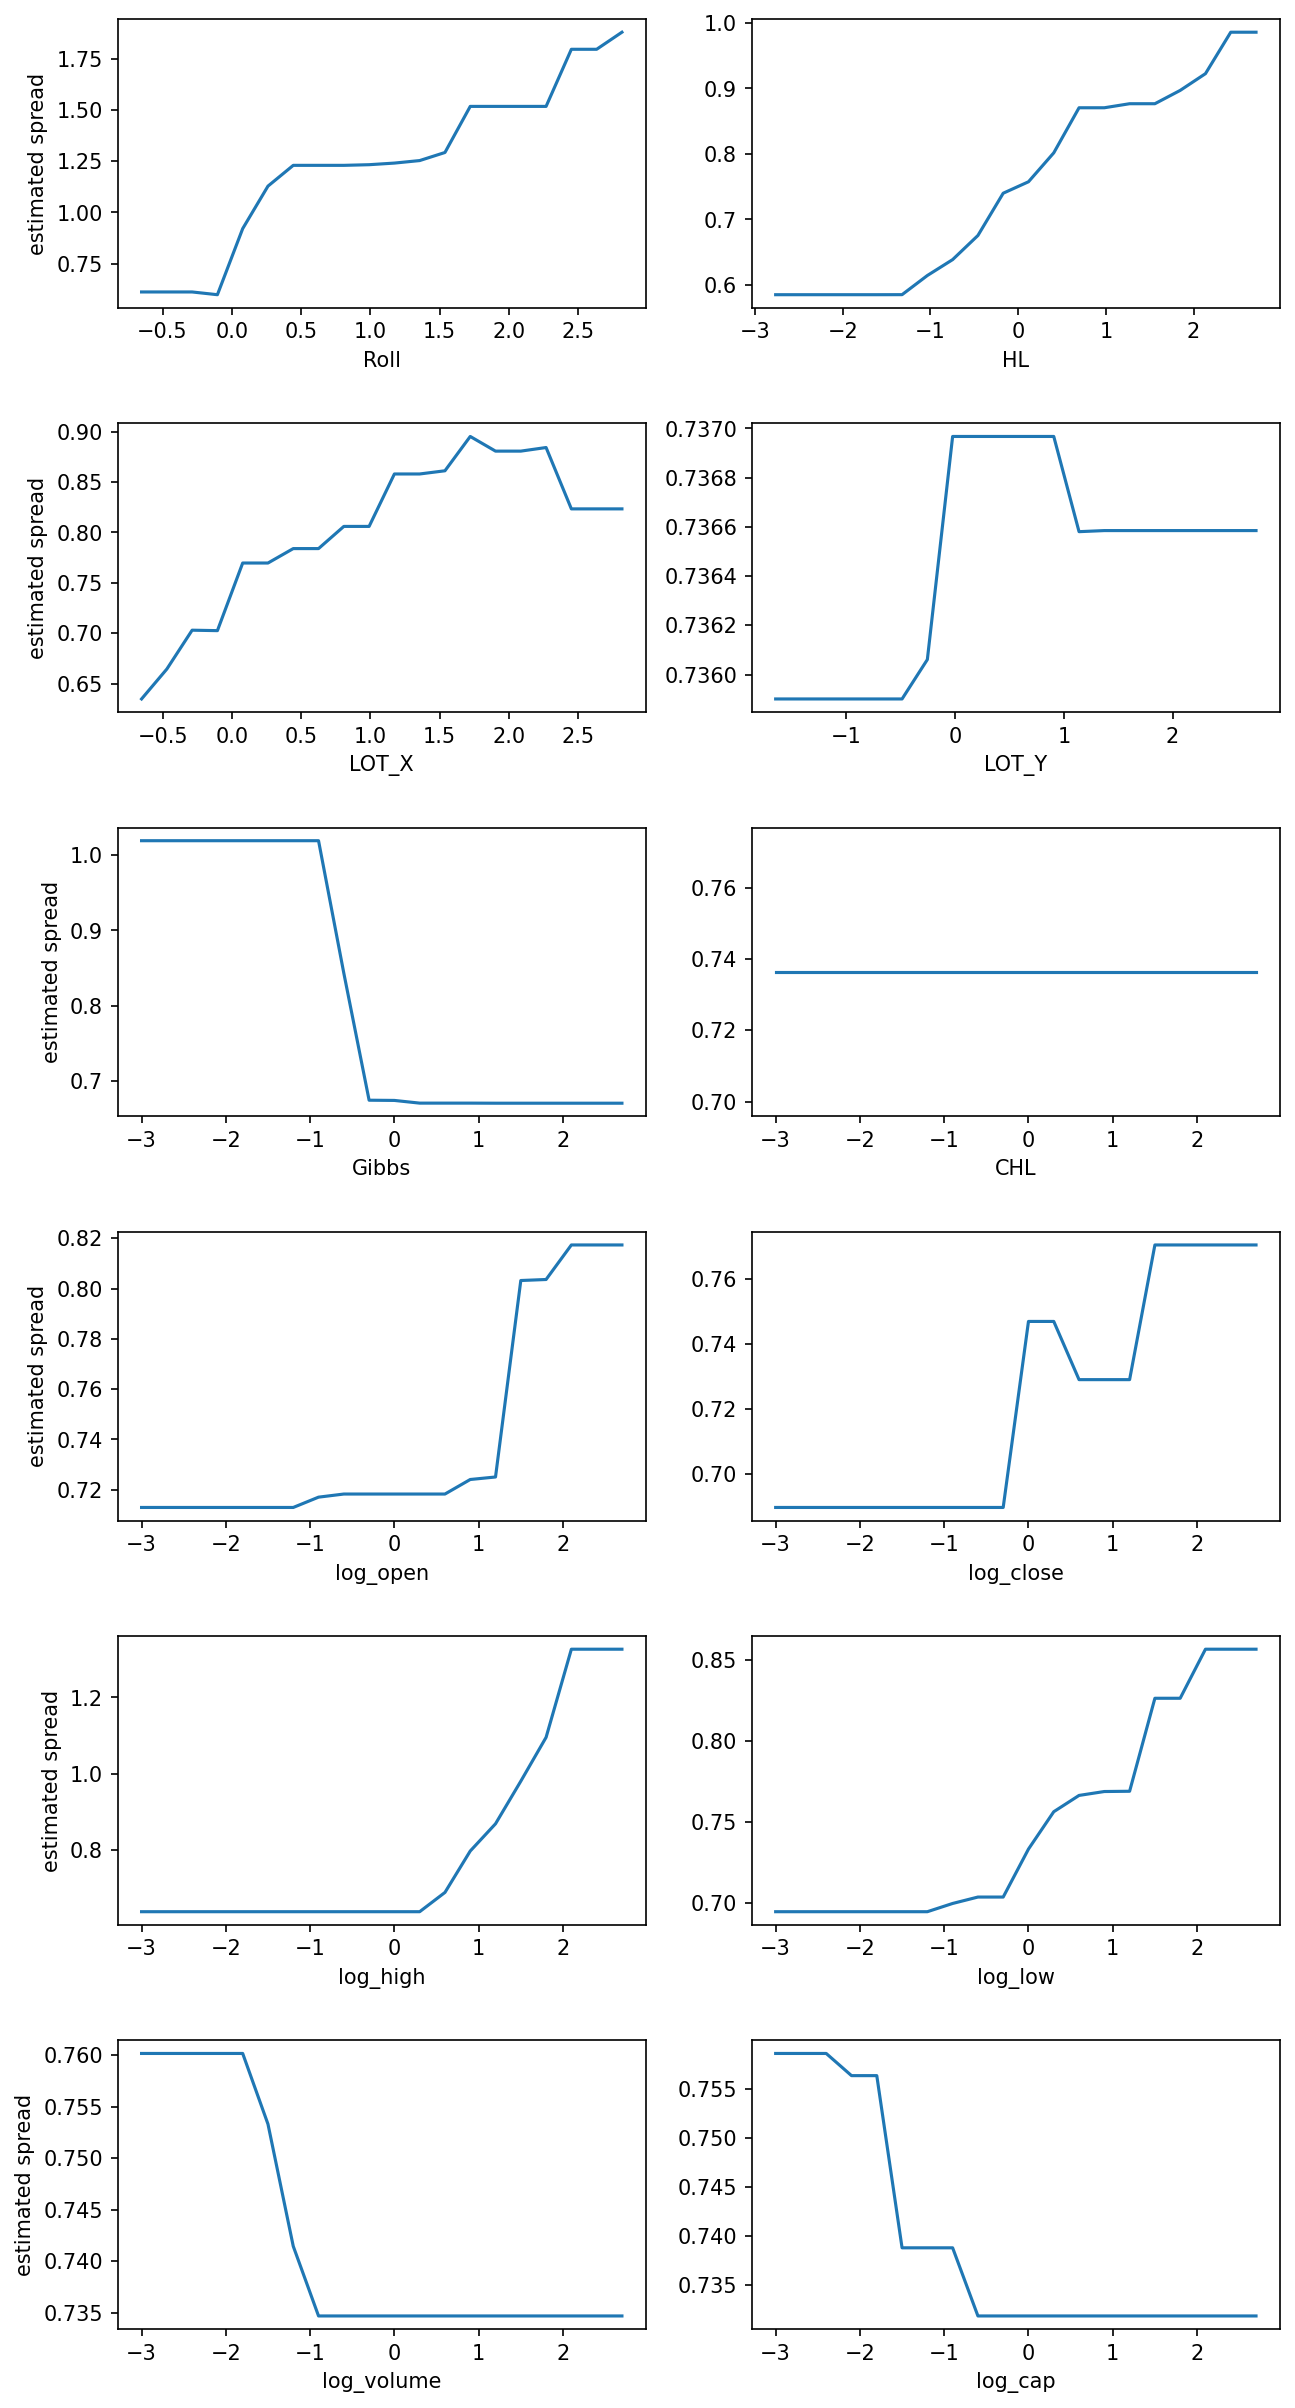

In [82]:
plt.figure(figsize=(10,20), dpi=150)
plt.subplots_adjust(hspace=0.4)
for i in range(12):
    plt.subplot(6,2,i+1)
    plt.plot(x_m[i], np.array(y_m[i]))
    plt.xlabel(fea_names[i])
    if i%2 == 0:
        plt.ylabel('estimated spread')
plt.show()

#### rela

In [99]:
se = SpreadEstimator(market='SP500')
univ = se.data.data_dic['volume'] > 0  # 合法的univ

data_path = r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity"
univ = se.data.data_dic['volume'] > 0  # 合法的univ
with open(f'{data_path}/signal_rela.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(f'{data_path}/target_rela.pkl', 'rb') as f:
    target = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ, 20, 120)
xx = []
for x_ in x:
    for i in range(x_.shape[1]):
        x_[:, i] -= torch.mean(x_[:, i])
        x_[:, i] /= torch.std(x_[:, i])
    xx.append(x_)
x = xx
x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)

x_m = []
y_m = []
for i in tqdm(range(12)):
    lb = np.nanmax([torch.min(x[:, i]).item(),-3])
    ub = np.nanmin([torch.max(x[:, i]).item(),3])
    x_rp = np.arange(lb,ub,(ub-lb)/20)
    y_rp = []
    for xx in x_rp:
        x_new = torch.clone(x)
        x_new[:,i] = xx
        y_rp.append(np.mean(lgbm_rela.predict(x_new.cpu().detach().numpy()))*100)
    x_m.append(x_rp)
    y_m.append(y_rp)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00, 10.26it/s]


In [101]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_x_lgb_rela.pkl", 'wb') as f:
    pickle.dump(x_m, f)
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\pdp_y_lgb_rela.pkl", 'wb') as f:
    pickle.dump(y_m, f)

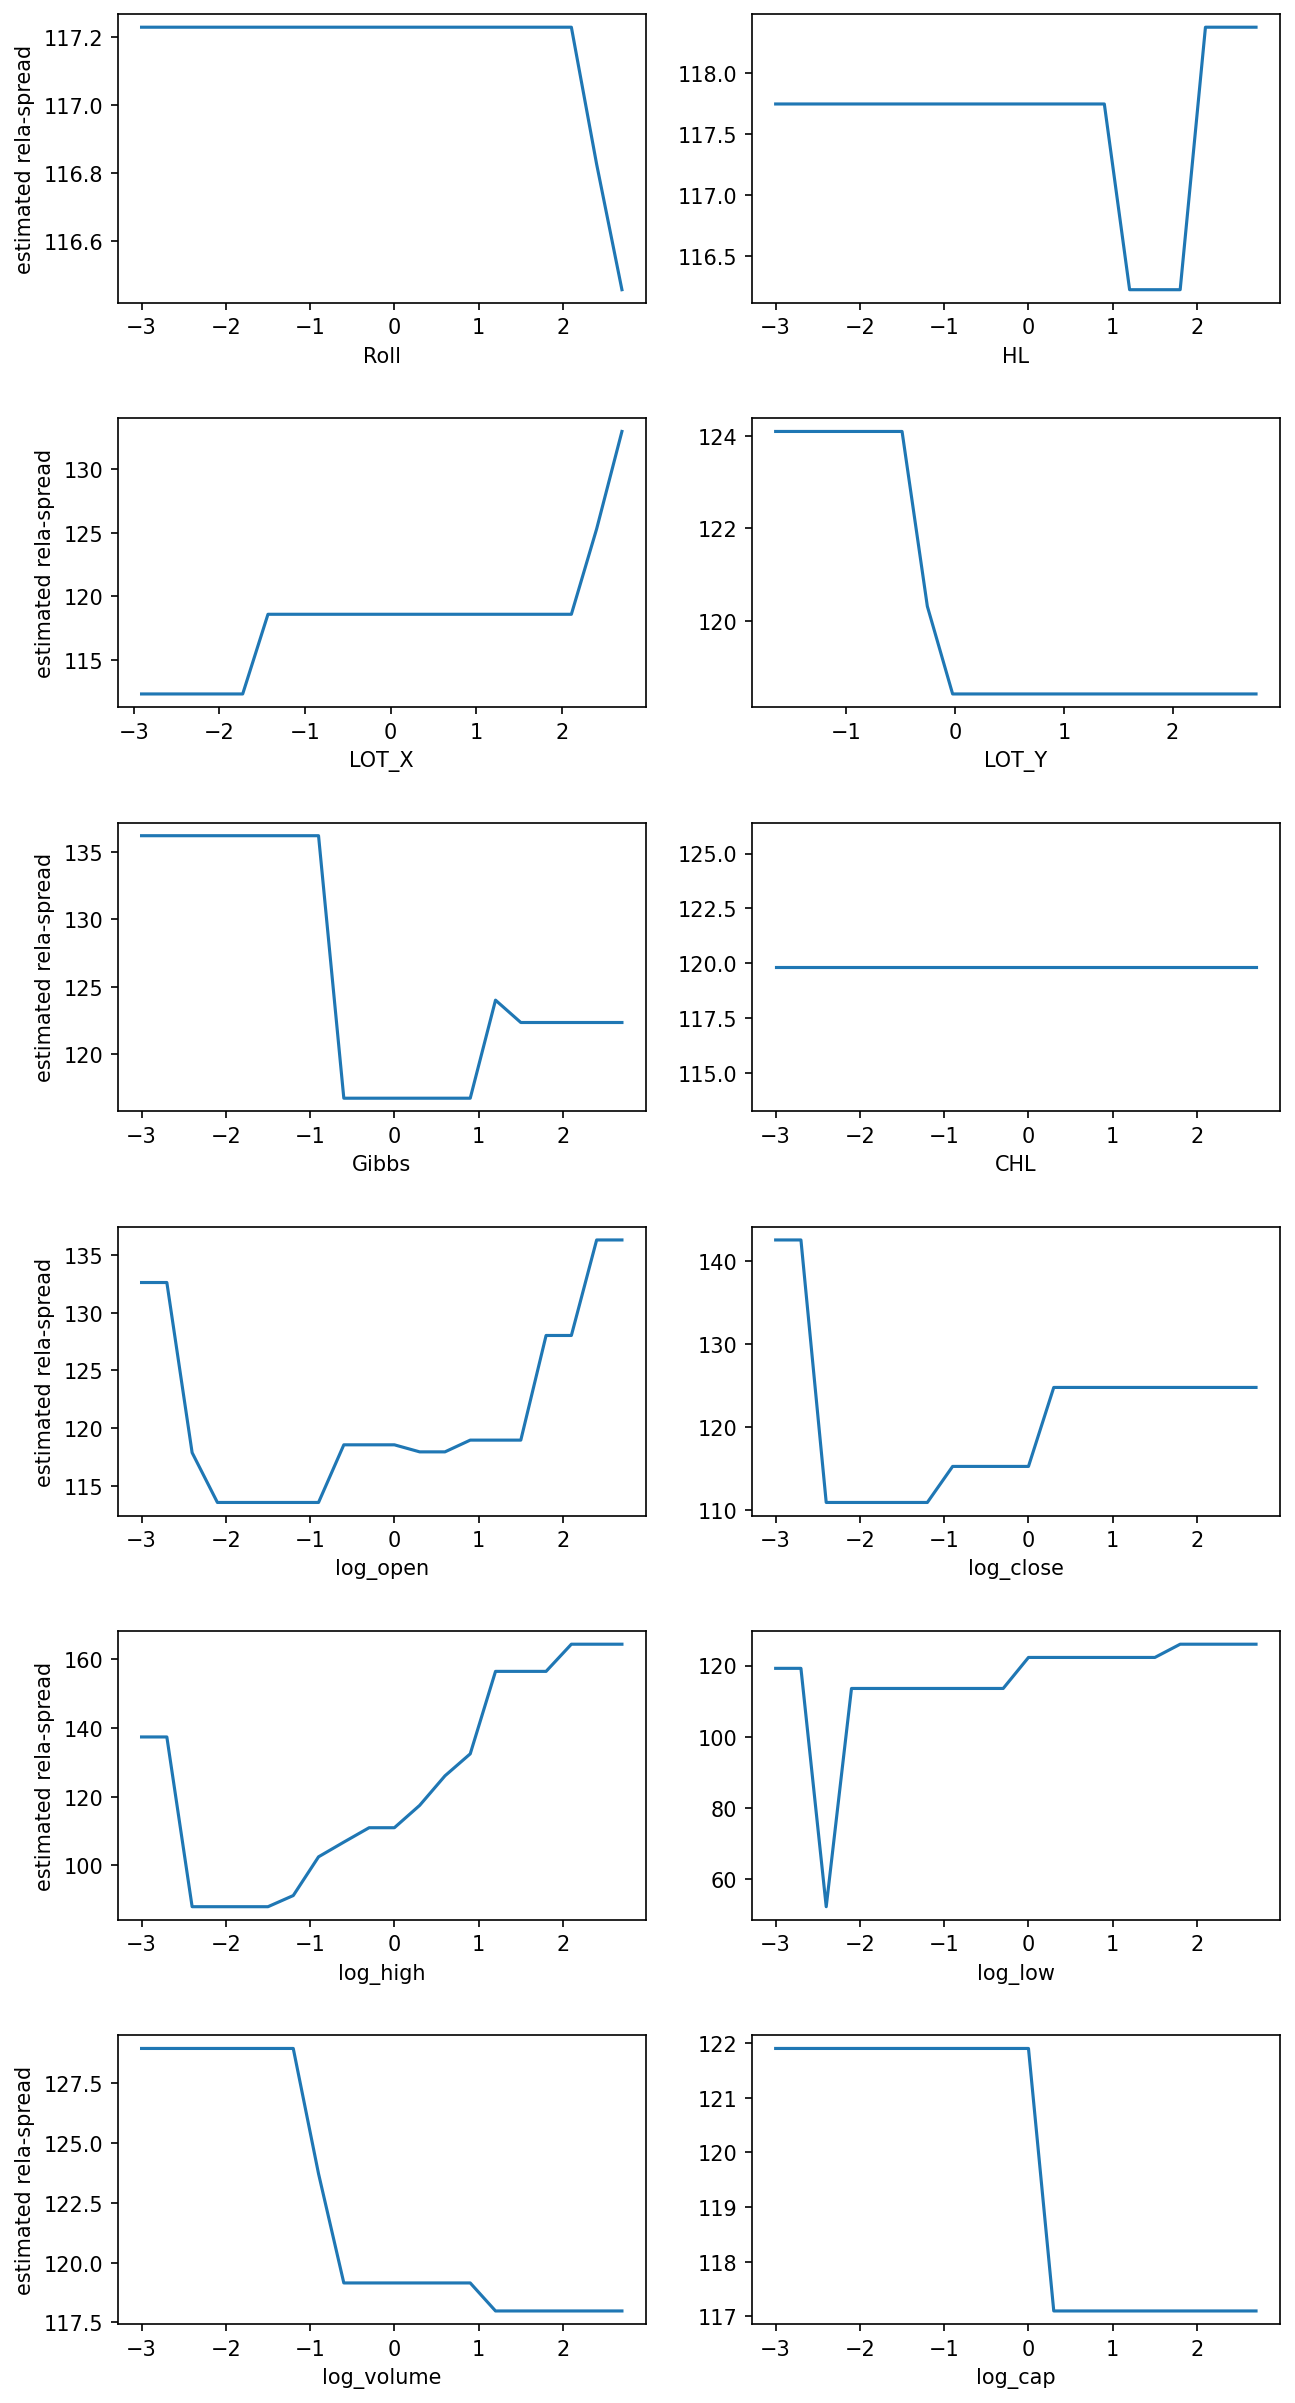

In [85]:
plt.figure(figsize=(10,20), dpi=150)
plt.subplots_adjust(hspace=0.4)
for i in range(12):
    plt.subplot(6,2,i+1)
    plt.plot(x_m[i], np.array(y_m[i])*100)
    plt.xlabel(fea_names[i])
    if i%2 == 0:
        plt.ylabel('estimated rela-spread')
plt.show()

### Shapley Value
1. 字典：每个样本每个特征的特征值，shapley value值，以及对应的该样本的超额输出
2. 计算每个特征的shapley value值的绝对值的均值；
3. 计算每个特征的特征值和shapley value值的关系；

In [7]:
GateNet_rela_cs = torch.load(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\dump_model\GateNet_rela_cs.pt")
GateNet_spread_cs = torch.load(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\dump_model\GateNet_spread_cs.pt")

In [6]:
def sv(model, x, M: int = 1000000):
    res = {i: [] for i in range(x.shape[1])} 
    for i in tqdm(range(len(x))):  # 循环每个样本
        for j in range(x.shape[1]):  # 循环每个特征
            se = torch.rand(M, x.shape[1]).cuda()
            se[se>0.5] = 1
            se[se<0.5] = 0
            se = se.bool()
            
            sam_sum = (torch.rand(M).cuda()*len(x)).long()
            
            x_this = x[i].repeat(M, 1)
            x_tmp = x[sam_sum]  # 随机样本
            x_tmp[~se] = x_this[~se]  # 全随机替换
            
            r = -torch.mean(model(x_tmp)).item()
            x_tmp[:, j] = x_this[:, j]  # j不替换
            r += torch.mean(model(x_tmp)).item()
            res[j].append((x[i, j].item(), r, model(x[i: i+1]).item()))  # (特征值，shapley value，输出)
    return res 

### rela_spread的shapley value

In [4]:
se = SpreadEstimator(market='SP500')
univ = se.data.data_dic['volume'] > 0  & (se.data.spread_dic['spread']<50)  # 合法的univ

data_path = r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity"

with open(f'{data_path}/signal_rela.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(f'{data_path}/target_rela.pkl', 'rb') as f:
    target = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ, 20, 120)

for i in range(signal.shape[0]):
    for j in range(signal.shape[2]):
        signal[i, univ[i], j] -= np.nanmean(signal[i, univ[i], j])
        signal[i, univ[i], j] /= np.nanstd(signal[i, univ[i], j])
x, y = get_train_data_cs(signal, target, univ, s=120, e=220)

x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)
print(x.shape)

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 768.79it/s]
invalid value encountered in divide
invalid value encountered in subtract
invalid value encountered in subtract
Mean of empty slice
Degrees of freedom <= 0 for slice.
100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 7166.93it/s]

torch.Size([47953, 12])


In [8]:
res = sv(GateNet_rela_cs, x[::100], M=10000)

100%|████████████████████████████████████████████████████████████████████████████████| 480/480 [00:11<00:00, 40.44it/s]


### 全部的特征的shapley value的绝对值平均

In [1]:
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [9]:
shap_v = np.vstack([np.array([j[1] for j in res[i]]) for i in [2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11]]).T
fea_v = np.vstack([np.array([j[0] for j in res[i]]) for i in [2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11]]).T
shap_v.shape

(480, 12)

In [94]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\shap_gr_rela.pkl", 'wb') as f:
    pickle.dump(np.mean(np.abs(shap_v), axis=0), f)

In [22]:
tmp = shap_v.copy()
tmp[np.abs(tmp)>20] = 0
# with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\shap_gr_rela.pkl", 'wb') as f:
#     pickle.dump(np.mean(np.abs(tmp), axis=0), f)

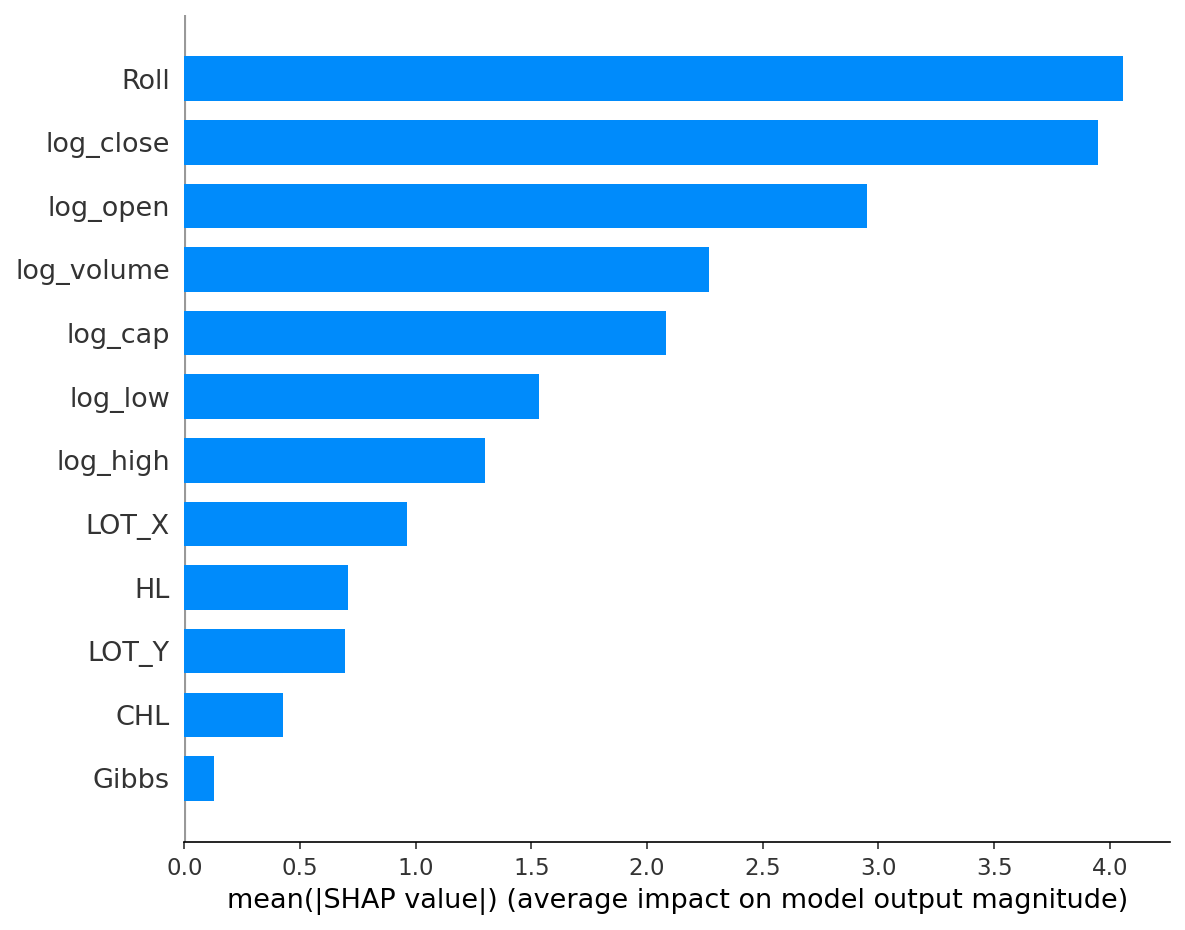

In [23]:
plt.figure(dpi=150)
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])
shap.summary_plot(tmp, fea_v, feature_names=fea_names, plot_type='bar')


In [24]:
tmp = shap_v.copy()
tmp[np.abs(tmp)>20] = 0

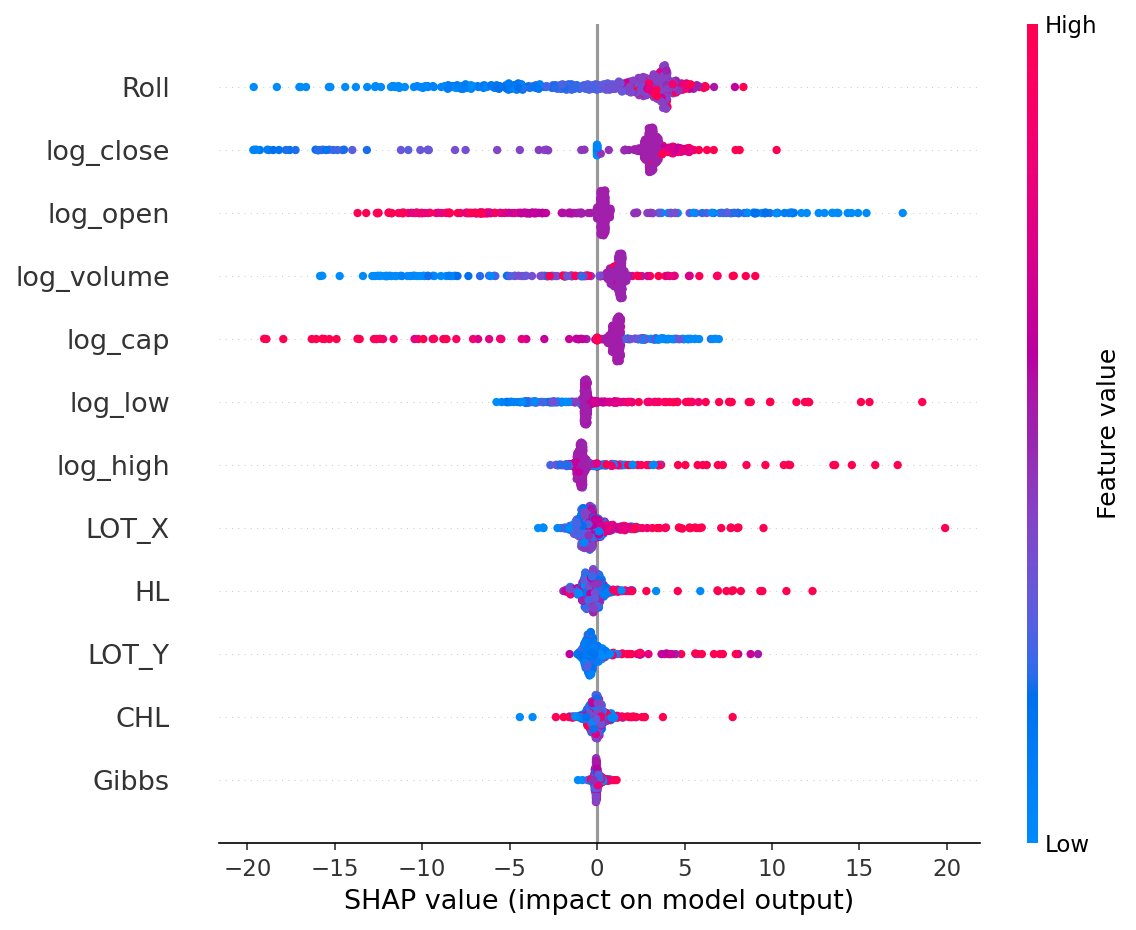

In [25]:
plt.figure(dpi=150)
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])
shap.summary_plot(tmp, fea_v, feature_names=fea_names)

### 价差的SHAP

In [65]:
se = SpreadEstimator(market='SP500')
univ = (se.data.data_dic['volume'] > 0) & (se.data.spread_dic['spread']<5)  # 合法的univ

data_path = r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity"

with open(f'{data_path}/signal_spread.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(f'{data_path}/target_spread.pkl', 'rb') as f:
    target = pickle.load(f)

for i in range(signal.shape[0]):
    for j in range(signal.shape[2]):
        signal[i, univ[i], j] -= np.nanmean(signal[i, univ[i], j])
        signal[i, univ[i], j] /= np.nanstd(signal[i, univ[i], j])
x, y = get_train_data_cs(signal, target * 100, univ, s=120, e=220)

x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)
print(x.shape)

invalid value encountered in divide
invalid value encountered in subtract
Mean of empty slice
100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2248.44it/s]

torch.Size([45697, 12])


In [66]:
res_spread = sv(GateNet_spread_cs, x[::100], M=10000)

100%|████████████████████████████████████████████████████████████████████████████████| 457/457 [00:11<00:00, 41.24it/s]


In [67]:
shap_v = np.vstack([np.array([j[1] for j in res_spread [i]]) for i in [2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11]]).T
fea_v = np.vstack([np.array([j[0] for j in res_spread [i]]) for i in [2, 1, 3, 4, 5, 0, 6,7,8,9, 10, 11]]).T
shap_v.shape

(457, 12)

In [89]:
np.mean(np.abs(shap_v), axis=0)

array([0.09078761, 0.05966992, 0.01100397, 0.01747618, 0.00223458,
       0.06037746, 0.01678373, 0.05521584, 0.02077162, 0.05259028,
       0.01778628, 0.01196205])

In [90]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\shap_gr_spread.pkl", 'wb') as f:
    pickle.dump(np.mean(np.abs(shap_v), axis=0), f)

In [74]:
tmp = shap_v.copy()
# tmp[np.abs(tmp)>0] = 0

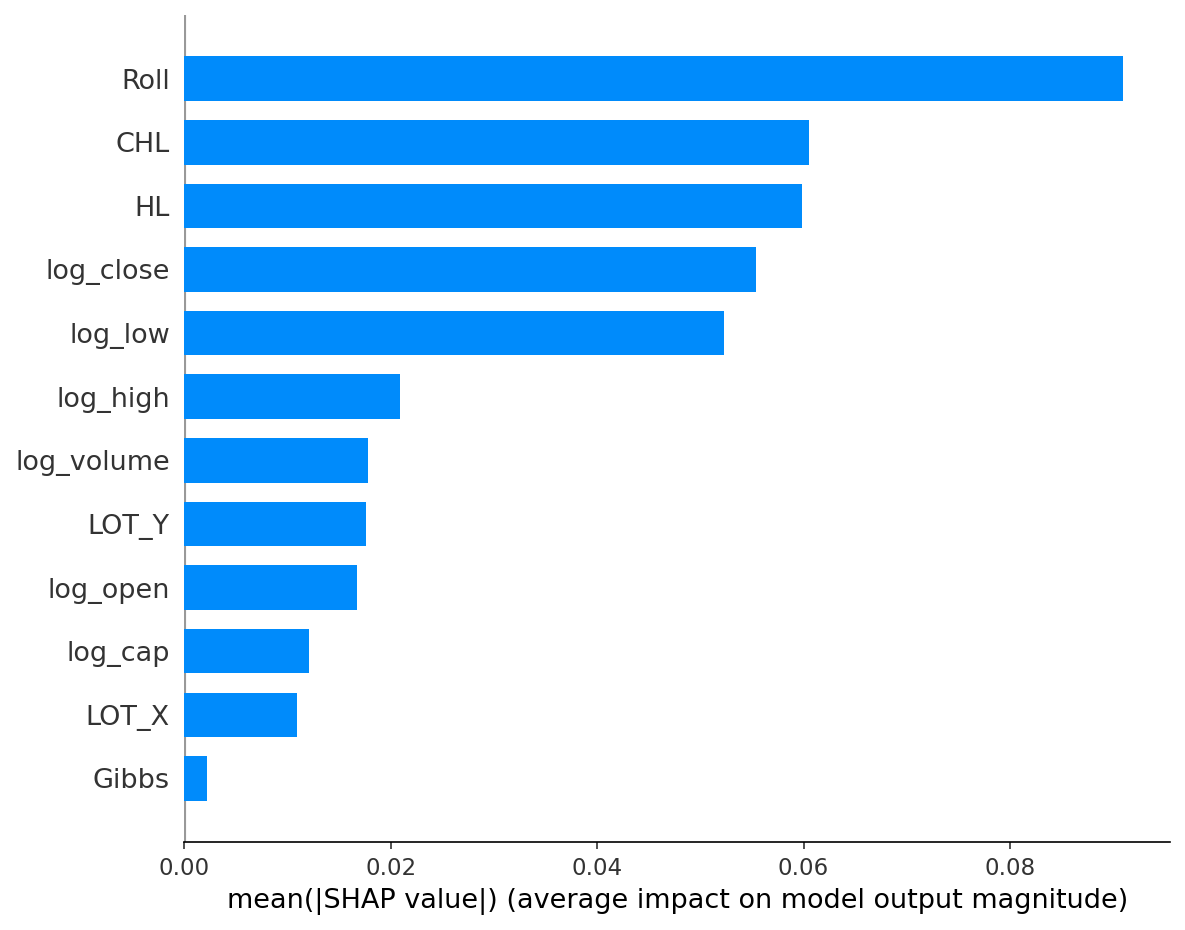

In [75]:
plt.figure(dpi=150)
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])
shap.summary_plot(tmp, fea_v, feature_names=fea_names, plot_type='bar')


In [70]:
tmp = shap_v.copy()
tmp[np.abs(tmp)>10] = 0

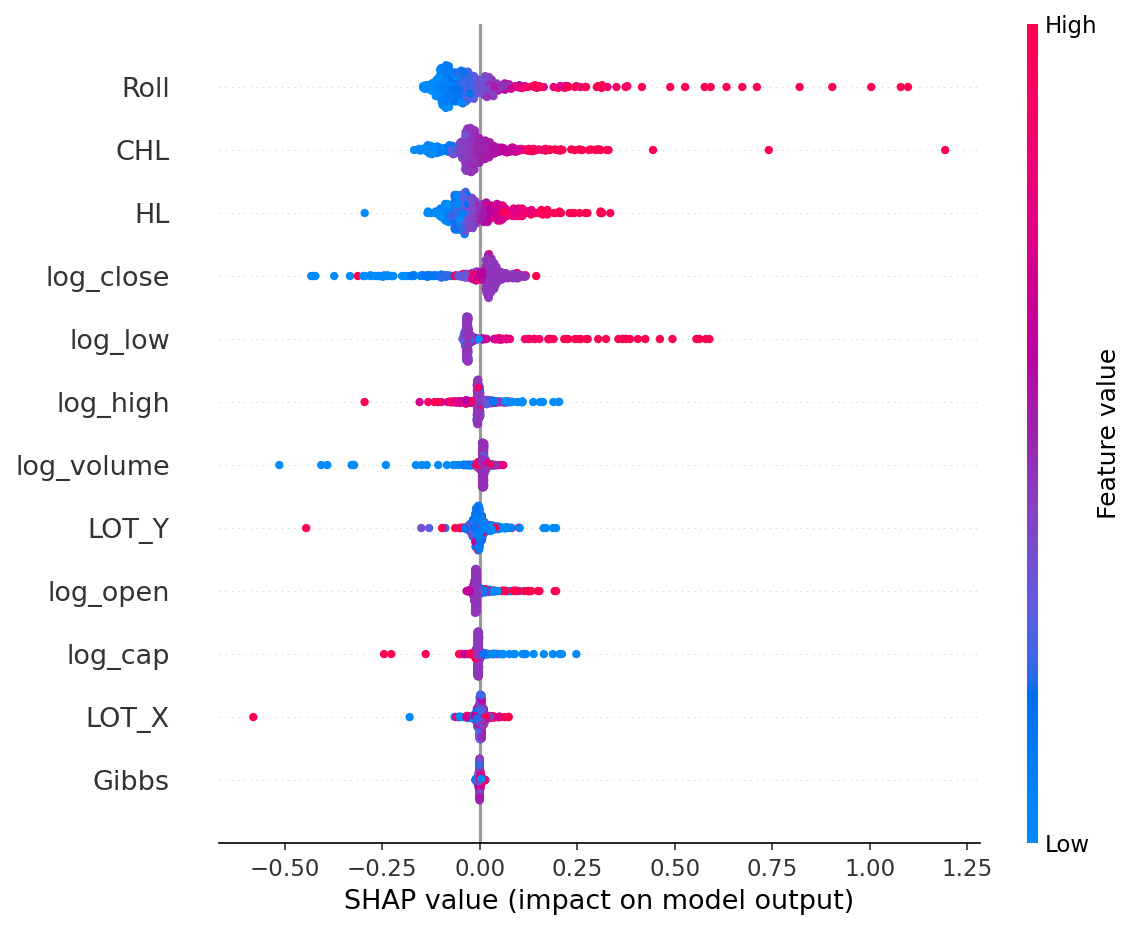

In [71]:
plt.figure(dpi=150)
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])
shap.summary_plot(tmp/1, fea_v, feature_names=fea_names)

In [35]:
shap_v.shape

(480, 12)